In [265]:
import numpy as pd
import pandas as pd

In [266]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1")

In [267]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [268]:
df.shape

(5572, 5)

In [269]:
# 1. Data cleaning
# 2. Exploratory Analysis
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvements
# 7. Websites
# 8. Deploy

## **1. Data Cleaning**

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [271]:
# drop last three columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [272]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [273]:
# renaming columns
df.columns = ['target', 'text']

In [274]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [275]:
from sklearn.preprocessing import LabelEncoder 

In [276]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df.target)

In [277]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [278]:
# check whether our dataset contain any missing values
df.isna().sum()

target    0
text      0
dtype: int64

In [279]:
# check whether our dataset has duplicate values
df.duplicated().sum()

np.int64(403)

In [280]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [281]:
df.shape

(5169, 2)

## **2. EDA**

In [282]:
data = df['target'].value_counts()
data

target
0    4516
1     653
Name: count, dtype: int64

where in above output, '0' refers to ham and '1' refers to spam

In [283]:
import matplotlib.pyplot as plt

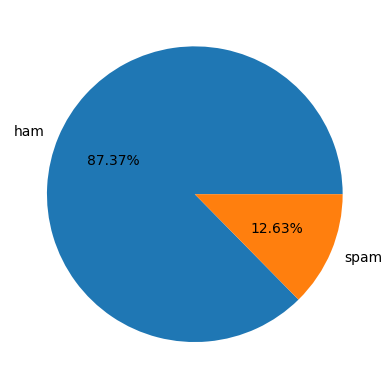

In [284]:
plt.pie(data, labels=('ham', 'spam'), autopct='%0.2f%%')
plt.show()

As we can see the data is imbalanced, where spam data are less likely in our dataset.

In [285]:
import nltk

In [286]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/bijaypokhrel05/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [287]:
df['num_characters'] = df['text'].apply(lambda x: len(x))

In [288]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [289]:
# num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [290]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [291]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [292]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()   # this give description of ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [293]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe() # this gives description of spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [294]:
import seaborn as sns

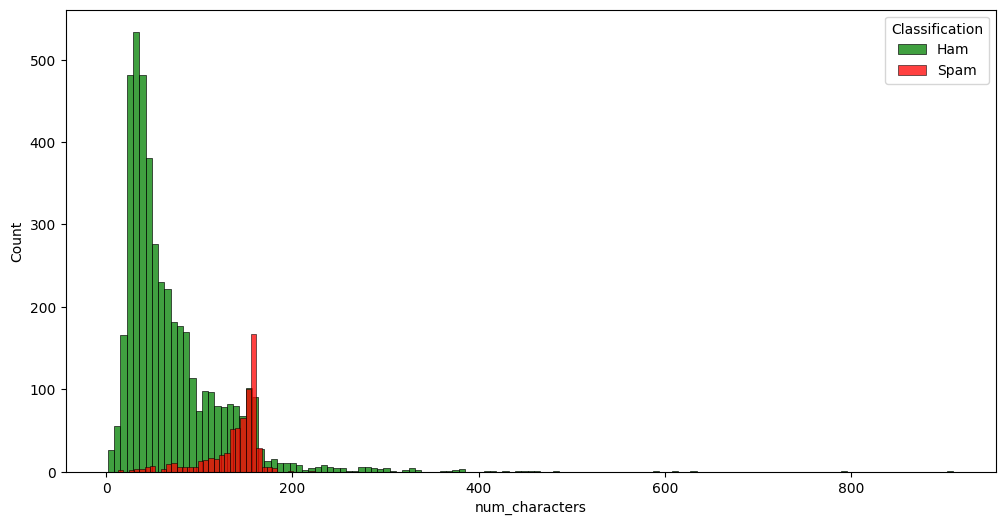

In [295]:
plt.figure(figsize=(12, 6))
sns.histplot(data = df[df['target'] == 0], x='num_characters', color='green', label='Ham')
sns.histplot(data = df[df['target'] == 1], x='num_characters', color='red', label='Spam')
plt.legend(title='Classification', loc='upper right')
plt.show()

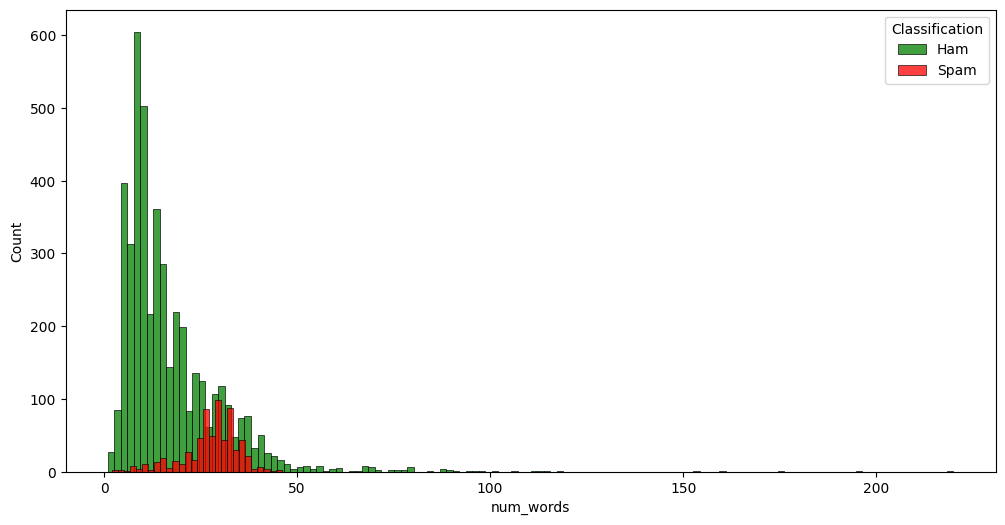

In [296]:
plt.figure(figsize=(12, 6))
sns.histplot(data = df[df['target'] == 0], x='num_words', color='green', label='Ham')
sns.histplot(data = df[df['target'] == 1], x='num_words', color='red', label='Spam')
plt.legend(title='Classification', loc='upper right')
plt.show()

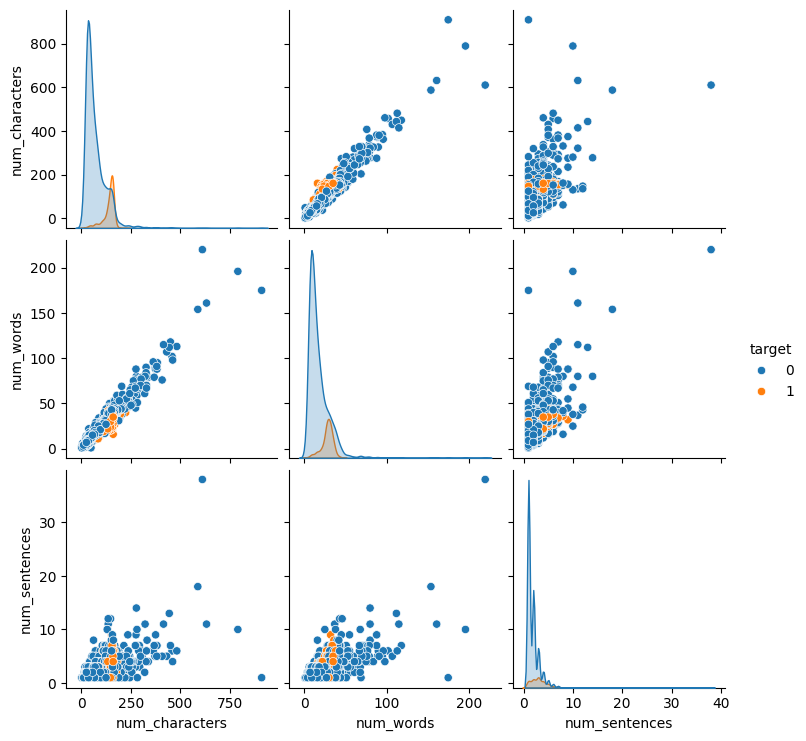

In [297]:
sns.pairplot(data=df, hue='target')
plt.show()

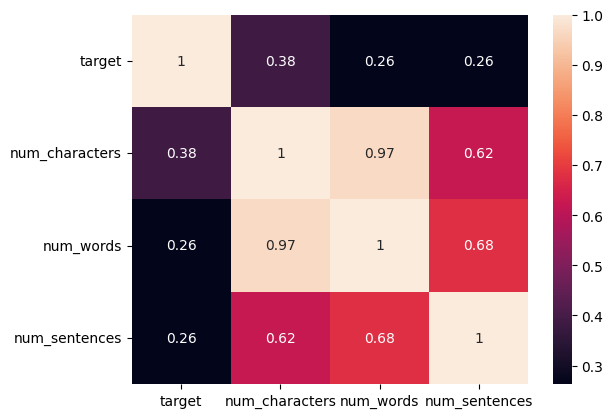

In [298]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

## **3. Data Preprocessing**
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [299]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/bijaypokhrel05/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [300]:
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.porter import PorterStemmer

In [301]:
ps = PorterStemmer()
ps.stem('looking')

'look'

In [302]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = [word for word in y if word not in stopwords.words('english') and word not in punctuation]

    # lematize our words
    stem_words = []
    for i in text:
        stem_words.append(ps.stem(i))

    return ' '.join(stem_words)

In [303]:
text_transform('I loved youtube lectures on Machine learning. How about you?')

'love youtub lectur machin learn'

In [304]:
df['transformed_text'] = df['text'].apply(text_transform)

In [305]:
from wordcloud import WordCloud

In [306]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

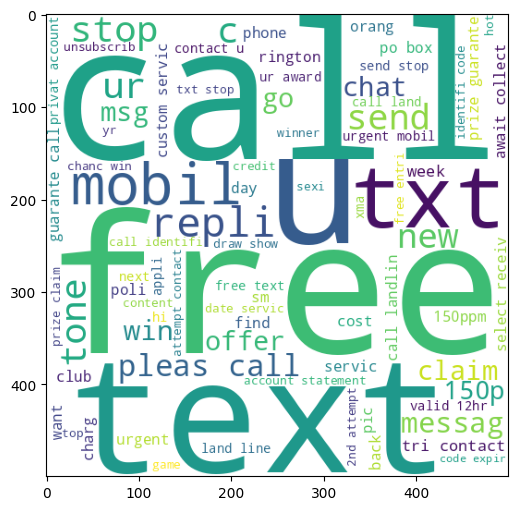

In [307]:
plt.figure(figsize=(20, 6))
plt.imshow(spam_wc)
plt.show()

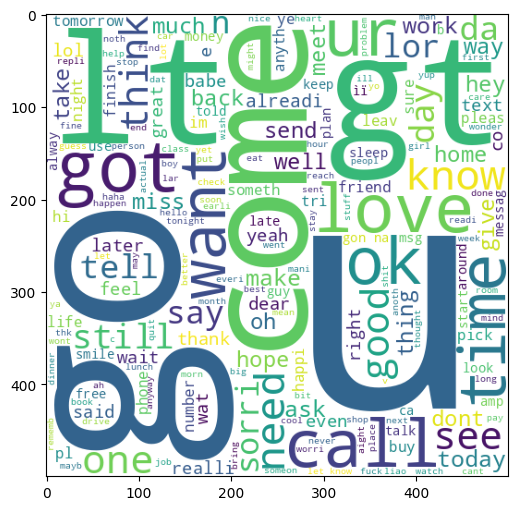

In [308]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(20, 6))
plt.imshow(ham_wc)
plt.show()

In [309]:
spam_corpus = []

for sent in df[df['target']==1]['transformed_text'].tolist():
    for word in sent.split():
        spam_corpus.append(word)

In [310]:
len(spam_corpus)

9939

In [311]:
from collections import Counter

freq_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

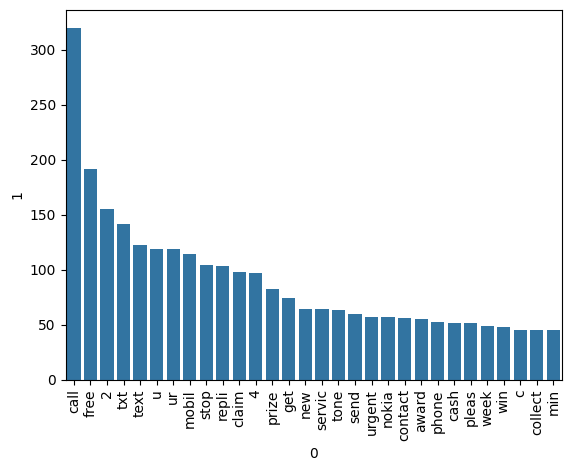

In [312]:
sns.barplot(data = freq_df, x = freq_df.iloc[:, 0], y = freq_df.iloc[:, 1])
plt.xticks(rotation=90)
plt.show()

In [313]:
ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [314]:
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_df.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


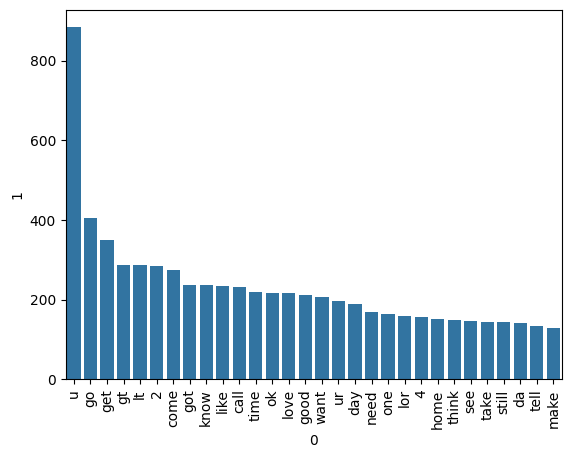

In [315]:
sns.barplot(data=ham_df, x=ham_df.iloc[:, 0], y=ham_df.iloc[:, 1])
plt.xticks(rotation=90)
plt.show()

## **4. Model Building using CountVectorizer** 

In [316]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [317]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [318]:
X.shape

(5169, 6708)

In [319]:
y = df['target'].values

In [320]:
y.shape

(5169,)

In [321]:
from sklearn.model_selection import train_test_split

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [323]:
# importing nv model because NB perform well with textual data
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [324]:
# initializing all the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [325]:
# create a function to predict and calculating performance metrics
def clf_performance(model, X_train, X_test, y_train, y_test):
    acc_prec = []
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('='*30)
    print(f"Performance Metrics of {str(model).strip('()')}\n")
    print('Confusion Matrix\n', confusion_matrix(y_test, y_pred))
    print()
    print('Accuracy =', accuracy_score(y_test, y_pred))
    print('Precision =', precision_score(y_test, y_pred))
    print('Recall =', recall_score(y_test, y_pred))
    acc_prec.append(accuracy_score(y_test, y_pred))
    acc_prec.append(precision_score(y_test, y_pred))
    acc_prec.append(recall_score(y_test, y_pred))

    return acc_prec


In [326]:
lst_of_models = [gnb, mnb, bnb]
acc_prec_of_clfs = {}
for clf in lst_of_models:
    clf_pre = clf_performance(clf, X_train, X_test, y_train, y_test)
    acc_prec_of_clfs[str(clf).strip('()')] = clf_pre

Performance Metrics of GaussianNB

Confusion Matrix
 [[792 104]
 [ 20 118]]

Accuracy = 0.8800773694390716
Precision = 0.5315315315315315
Recall = 0.855072463768116
Performance Metrics of MultinomialNB

Confusion Matrix
 [[871  25]
 [ 12 126]]

Accuracy = 0.9642166344294004
Precision = 0.8344370860927153
Recall = 0.9130434782608695
Performance Metrics of BernoulliNB

Confusion Matrix
 [[893   3]
 [ 28 110]]

Accuracy = 0.9700193423597679
Precision = 0.9734513274336283
Recall = 0.7971014492753623


In [327]:
acc_prec_of_clfs

{'GaussianNB': [0.8800773694390716, 0.5315315315315315, 0.855072463768116],
 'MultinomialNB': [0.9642166344294004, 0.8344370860927153, 0.9130434782608695],
 'BernoulliNB': [0.9700193423597679, 0.9734513274336283, 0.7971014492753623]}

In [328]:
# create a dataframe
model_df = pd.DataFrame(acc_prec_of_clfs, index=['Accuracy', 'Precision', 'Recall'])
model_df = model_df.T
model_df.index.name = 'Models'

In [329]:
# Since our main concern is to reduce the type one error i.e. False positive. So, sort according to precision
model_df.sort_values(['Precision', 'Accuracy'], ascending=False, inplace=True)

In [330]:
model_df

,Accuracy,Precision,Recall
Models,,,
BernoulliNB,0.970019,0.973451,0.797101
MultinomialNB,0.964217,0.834437,0.913043
GaussianNB,0.880077,0.531532,0.855072


## **Model Building using TFidfVectorizer**

In [331]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [332]:
tfidf = TfidfVectorizer(max_features=3000)

In [333]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [334]:
X1[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5, 3000))

In [335]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [336]:
lst_of_models = [gnb, mnb, bnb]
acc_prec_of_clfs = {}
for clf in lst_of_models:
    clf_pre = clf_performance(clf, X_train, X_test, y_train, y_test)
    acc_prec_of_clfs[str(clf).strip('()')] = clf_pre

Performance Metrics of GaussianNB

Confusion Matrix
 [[790 106]
 [ 24 114]]

Accuracy = 0.874274661508704
Precision = 0.5181818181818182
Recall = 0.8260869565217391
Performance Metrics of MultinomialNB

Confusion Matrix
 [[896   0]
 [ 30 108]]

Accuracy = 0.9709864603481625
Precision = 1.0
Recall = 0.782608695652174
Performance Metrics of BernoulliNB

Confusion Matrix
 [[895   1]
 [ 16 122]]

Accuracy = 0.9835589941972921
Precision = 0.991869918699187
Recall = 0.8840579710144928


In [337]:
acc_prec_of_clfs

{'GaussianNB': [0.874274661508704, 0.5181818181818182, 0.8260869565217391],
 'MultinomialNB': [0.9709864603481625, 1.0, 0.782608695652174],
 'BernoulliNB': [0.9835589941972921, 0.991869918699187, 0.8840579710144928]}

In [338]:
model_df_with_tfidf = pd.DataFrame(acc_prec_of_clfs, index=['Accuracy', 'Precision', 'Recall'])
model_df2 = model_df_with_tfidf.T
model_df2.index.name = 'Models'

In [339]:
model_df2

,Accuracy,Precision,Recall
Models,,,
GaussianNB,0.874275,0.518182,0.826087
MultinomialNB,0.970986,1.000000,0.782609
BernoulliNB,0.983559,0.991870,0.884058


In [340]:
print('This is the performance result with TfidfVectorizer')
model_df2.sort_values(['Precision', 'Accuracy'], ascending=False, inplace=True)
model_df2

This is the performance result with TfidfVectorizer


,Accuracy,Precision,Recall
Models,,,
MultinomialNB,0.970986,1.000000,0.782609
BernoulliNB,0.983559,0.991870,0.884058
GaussianNB,0.874275,0.518182,0.826087


As you can see in above dataframe, using tfidf with multinomial Naive Bayes actually perform very well. So, finally we concluded that multinomial model is the prefect choice for this project.

In [341]:
mnb1 = MultinomialNB()
mnb1.fit(X_train, y_train)

MultinomialNB()

In [342]:
txt = text_transform('Free entry in 2 a wkly comp to win FA Cup fina...')

In [343]:
Xx = tfidf.transform([txt]).toarray()

In [344]:
print(mnb1.predict(Xx))

[1]


In [345]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb1, open('model.pkl', 'wb'))